<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [115]:
import ipyparallel as ipp
from mpi4py import MPI

In [116]:
# use on command line:
# ipcluster start -n 6

In [117]:
cluster = ipp.Client(profile='mpi')
print('profile:', cluster.profile)
print("IDs:", cluster.ids) # Print process id numbers
%px import numpy as np

Waiting for connection file: ~/.ipython/profile_mpi/security/ipcontroller-client.json


OSError: Connection file '~/.ipython/profile_mpi/security/ipcontroller-client.json' not found.
You have attempted to connect to an IPython Cluster but no Controller could be found.
Please double-check your configuration and ensure that a cluster is running.

In [118]:
%%px

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# passing MPI datatypes explicitly
if rank == 0:
    data = np.arange(100, dtype='i')
    np.random.shuffle(data)
    comm.Send([data, MPI.INT], dest=1, tag=77)
    print("{} of {}: sent data to 1: {}".format(rank, size, data))
elif rank == 1:
    data = np.empty(100, dtype='i')
    comm.Recv([data, MPI.INT], source=0, tag=77)
    print("{} of {}: received data from 0: {}".format(rank, size, data))
else:
    print("{}: idle".format(rank))

UsageError: Cell magic `%%px` not found.


In [119]:
%%px
color = rank // 2 

UsageError: Cell magic `%%px` not found.


In [120]:
%%px
new_comm = comm.Split(color, rank)

UsageError: Cell magic `%%px` not found.


In [121]:
%%px
new_rank = new_comm.Get_rank()
new_size = new_comm.Get_size()
print("Color: {} / Local: {} of {} / Global: {} of {}".format(color, new_rank, new_size, rank, size))

UsageError: Cell magic `%%px` not found.


In [122]:
from cubedspherepartitioner import CubedSpherePartitioner

SyntaxError: invalid syntax (cubedspherepartitioner.py, line 144)

In [123]:
CubedSpherePartitioner

NameError: name 'CubedSpherePartitioner' is not defined

In [426]:
import numpy as np
import math

In [427]:
cube_neighbors = {1: {'U': [3, 3], 'D': [6, 0], 'L': [5, 1], 'R': [2, 0]},
                  2: {'U': [3, 0], 'D': [6, 3], 'L': [1, 0], 'R': [4, 1]},
                  3: {'U': [5, 3], 'D': [2, 0], 'L': [1, 1], 'R': [4, 0]},
                  4: {'U': [5, 0], 'D': [2, 3], 'L': [3, 0], 'R': [6, 1]},
                  5: {'U': [1, 3], 'D': [4, 0], 'L': [3, 1], 'R': [6, 0]},
                  6: {'U': [1, 0], 'D': [4, 3], 'L': [5, 0], 'R': [2, 1]}}

In [428]:
size = 6
ranks_per_tile = size // 6
my_tile = size // ranks_per_tile
ranks_per_axis = int(math.sqrt(ranks_per_tile))


In [429]:
tiles_placement = {i: (i // ranks_per_tile) + 1 for i in range(size)}

In [430]:
tiles_placement.items()

dict_items([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)])

In [431]:
ranks_placement = dict()
for k, v in tiles_placement.items():
    ranks_placement.setdefault(v, list()).append(k)

In [432]:
ranks_placement

{1: [0], 2: [1], 3: [2], 4: [3], 5: [4], 6: [5]}

In [433]:
tile_roots = {v: k[0] for v, k in ranks_placement.items()}

In [434]:
tile_roots

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}

In [435]:
assert cube_neighbors[1]['L'][0] == cube_neighbors[6]['L'][0] == cube_neighbors[4]['U'][0], 'Cube geometry faulty'
assert cube_neighbors[6]['D'][0] == cube_neighbors[2]['R'][0] == cube_neighbors[3]['R'][0], 'Cube geometry faulty' 
assert cube_neighbors[3]['U'][0] == cube_neighbors[6]['L'][0] == cube_neighbors[1]['L'][0], 'Cube geometry faulty'

In [436]:
for i in range(6):
    rotation_sum = 0
    [rotation_sum := rotation_sum + k[1] for v, k in cube_neighbors[i+1].items()]
    assert rotation_sum == 4, 'Cube geometry faulty' 


In [437]:
rotations = [0, 0, 1, 3, 3, 0]
rank_grid = np.asarray([np.rot90(np.flipud(np.asarray(ranks_placement[i+1]).reshape(ranks_per_axis, -1)), rotations[i]) for i in range(6)])

In [438]:
[[j for j in i.ravel()] for i in rank_grid]

[[0], [1], [2], [3], [4], [5]]

In [439]:
for i in rank_grid:
    print(i)

[[0]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]


In [440]:
np.rot90(rank_grid[3],3)

array([[3]])

In [441]:
m = np.array([[5, 0],
              [0, 5]])

In [442]:
np.rot90(m, 0)

array([[5, 0],
       [0, 5]])

In [443]:
np.rot90(m, -1)

array([[0, 5],
       [5, 0]])

In [444]:
np.rot90(m, 3)

array([[0, 5],
       [5, 0]])

In [445]:
x =  np.flipud(np.arange(4).reshape((2,-1)))

In [446]:
x

array([[2, 3],
       [0, 1]])

In [447]:
for i in range(4):
    print(np.rot90(x,i))

[[2 3]
 [0 1]]
[[3 1]
 [2 0]]
[[1 0]
 [3 2]]
[[0 2]
 [1 3]]


In [448]:
import matplotlib.pyplot as plt
%matplotlib inline

(-1.0, 2.0)

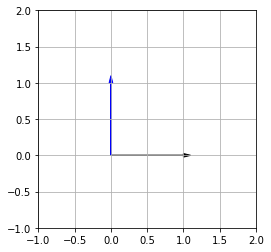

In [449]:

X = np.array((0))
Y = np.array((0))
E= np.array([[1, 0],
             [0, 1]])


fig, ax = plt.subplots()
q1 = ax.arrow(X, Y, E[0, 0], E[1, 0], head_width=0.05, head_length=0.1, fc='k', ec='k')
q2 = ax.arrow(X, Y, E[0, 1], E[1, 1], head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.grid()
ax.set_aspect('equal')

plt.xlim(-1,2)
plt.ylim(-1,2)

[[1 0]
 [0 1]]
[[ 0  1]
 [-1  0]]
[[-1  0]
 [ 0 -1]]
[[ 0 -1]
 [ 1  0]]


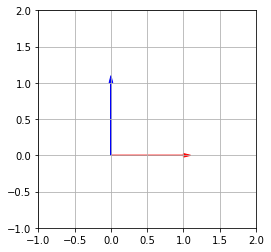

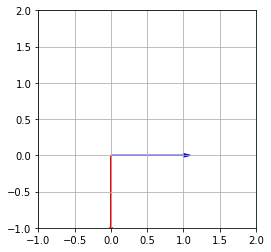

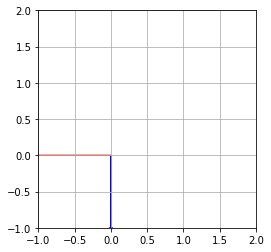

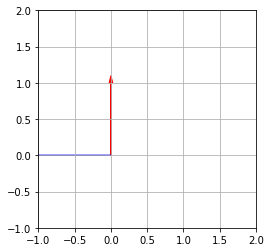

In [450]:
for i in range(4):
    E= np.array([[1, 0],
                 [0, 1]])
    E = np.matmul(rotate_90_deg[i], E)        
    print(E)
    fig, ax = plt.subplots()
    q1 = ax.arrow(X, Y, E[0, 0], E[1, 0], head_width=0.05, head_length=0.1, fc='r', ec='r')
    q2 = ax.arrow(X, Y, E[0, 1], E[1, 1], head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.grid()
    ax.set_aspect('equal')

    plt.xlim(-1,2)
    plt.ylim(-1,2)

In [451]:
rot_L = np.array([[0,-1],
                  [1, 0]])

In [452]:
rot_R = np.array([[ 0, 1],
                  [-1, 0]])

In [453]:
rotate_90_deg = np.asarray([ [[ 1, 0],
                        [ 0, 1]],
                       [[ 0, 1],
                        [-1, 0]],
                       [[-1, 0],
                        [ 0,-1]],
                       [[ 0,-1],
                        [ 1, 0]] ])

In [454]:
rotate_90_deg[1]

array([[ 0,  1],
       [-1,  0]])

In [455]:
def setup_grid(__num_ranks):

    for ranks_x in range(math.floor( math.sqrt(__num_ranks) ), 0, -1):
        if __num_ranks % ranks_x == 0:
            break
    __size = (__num_ranks // ranks_x, ranks_x)
    return __size

In [456]:
setup_grid()

TypeError: setup_grid() missing 1 required positional argument: '__num_ranks'

In [457]:
a,b = rank_grid[0],rank_grid

In [458]:
a

array([[0]])

In [459]:
b

array([[[0]],

       [[1]],

       [[2]],

       [[3]],

       [[4]],

       [[5]]])

In [460]:
np.hstack((a,b,a))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

In [461]:
np.vstack((a,b))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

In [462]:
aaa = np.array([1,3,6])

In [463]:
rank_grid

array([[[0]],

       [[1]],

       [[2]],

       [[3]],

       [[4]],

       [[5]]])

In [464]:
left_right_grid = np.hstack((rank_grid[[4,0,1]]))
up_down_grid = np.vstack((rank_grid[[2, 0, 5]])) 

In [465]:
global_rank = 3
y_left_right_grid, x_left_right_grid = np.where(left_right_grid == global_rank)
y_up_down_grid, x_up_down_grid = np.where(up_down_grid == global_rank)

In [466]:
rank_neighbors = { 'U': up_down_grid[(y_up_down_grid-1, x_up_down_grid)].item(),
                   'D': up_down_grid[(y_up_down_grid+1, x_up_down_grid)].item(),
                   'L': left_right_grid[(y_left_right_grid, x_left_right_grid-1)].item(),
                   'R': left_right_grid[(y_left_right_grid, x_left_right_grid+1)].item()}

ValueError: can only convert an array of size 1 to a Python scalar

In [467]:
rank_neighbors.items()

dict_items([('U', 17), ('D', 13), ('L', 14), ('R', 20)])

In [468]:
rank_neighbors['U']

17

In [469]:
assert (2, 1) ==  np.where(up_down_grid == global_rank), \
    blub

NameError: name 'blub' is not defined

In [470]:
[i for i in cube_neighbors[1]]

['U', 'D', 'L', 'R']

In [471]:
ttt = [cube_neighbors[1][d] for d in ['U', 'D', 'L', 'R']]

In [472]:
ttt

[[3, 3], [6, 0], [5, 1], [2, 0]]

In [473]:
ttt[0][0]

3

In [474]:
[k,v for k,v in cube_neighbors[1].items())]

SyntaxError: invalid syntax (<ipython-input-474-96604c4814a0>, line 1)

In [475]:
def __calculate_rank_grid(tile, tile2ranks, ranks_per_axis, rotation):
    return np.rot90(np.flipud(np.asarray(tile2ranks[tile]).reshape(ranks_per_axis, -1)), rotation)

In [476]:
__calculate_rank_grid(2, ranks_placement, 2, 3)

ValueError: cannot reshape array of size 1 into shape (2,newaxis)

In [477]:
cube_neighbors[1].keys()

dict_keys(['U', 'D', 'L', 'R'])

In [478]:
tttt = {6: 9999}

In [479]:
for k,v in cube_neighbors[1].items():
    tttt[k]= v

In [480]:
tttt

{6: 9999, 'U': [3, 3], 'D': [6, 0], 'L': [5, 1], 'R': [2, 0]}

In [481]:
str(9)

'9'

In [482]:
tttt['U', 'D']

KeyError: ('U', 'D')

In [683]:
num_halo = 2
global_rank = 2
num_ranks = 6
ranks_per_tile = 1

In [684]:
def __rank_global2local():
        """Return local tile rank based on global rank, ranks per tile"""
        return global_rank % ranks_per_tile

In [685]:
local_rank = __rank_global2local()

In [686]:
local_rank

0

In [687]:
size = __setup_grid()

In [688]:
def __setup_grid():
        """Distribute ranks onto a Cartesian grid of workers"""
        for ranks_x in range(math.floor( math.sqrt(ranks_per_tile) ), 0, -1):
            if ranks_per_tile % ranks_x == 0:
                break
        return (ranks_per_tile // ranks_x, ranks_x)

In [689]:
def __rank_to_position(local_rank):
        """Find position of rank on worker grid"""
        # sanity check ---------
        # assert ( local_rank // size[1], local_rank % size[1] ) == np.where(rank_grid[tile] == global_rank), \
            # 'Check rank numbering consistency'
        # ----------------------
        return ( local_rank // size[1], local_rank % size[1] )

In [690]:
tile_neighbors = {1: {'U': [3, 1], 'D': [6, 0], 'L': [5, 3], 'R': [2, 0]},
                          2: {'U': [3, 0], 'D': [6, 1], 'L': [1, 0], 'R': [4, 3]},
                          3: {'U': [5, 1], 'D': [2, 0], 'L': [1, 3], 'R': [4, 0]},
                          4: {'U': [5, 0], 'D': [2, 1], 'L': [3, 0], 'R': [6, 3]},
                          5: {'U': [1, 1], 'D': [4, 0], 'L': [3, 3], 'R': [6, 0]},
                          6: {'U': [1, 0], 'D': [4, 1], 'L': [5, 0], 'R': [2, 3]}}

In [691]:
def __assign_ranks_tiles(num_ranks, ranks_per_tile):
        """Return dictionaries: rank->tile, tile->[ranks], tile->root rank"""
        
        rank2tile = {i: (i // ranks_per_tile) + 1 for i in range(num_ranks)} # 1-based tile numbering
        
        tile2ranks = dict()
        for k, v in rank2tile.items():
            tile2ranks.setdefault(v, list()).append(k)

        tile2root = {v: k[0] for v, k in tile2ranks.items()}

        return rank2tile, tile2ranks, tile2root

In [692]:
def __calculate_rank_grid(tile, tile2ranks, ranks_per_axis, rotation=0):
            """Return rotated array containing square grid of tile's global ranks"""
            return np.rot90(np.flipud(np.asarray(tile2ranks[tile]).reshape(ranks_per_axis, -1)), rotation)

In [693]:
def __assign_rank_grid(tile, tile2ranks, tile_neighbors, ranks_per_axis):
        """Return dictionary of arrays containing all neighboring tiles' placements of global ranks"""
        rank_grid = {tile: __calculate_rank_grid(tile, tile2ranks, ranks_per_axis)}
        for k, v in tile_neighbors[tile].items():
            rank_grid[k] = __calculate_rank_grid(v[0], tile2ranks, ranks_per_axis, v[1])
        return rank_grid

In [694]:
def __assign_rank_neighbors(global_rank, rank_grid, tile):
        """Return dictionary: global rank->global neighbor ranks"""
        up_down_grid = np.vstack((rank_grid['U'], rank_grid[tile], rank_grid['D']))
        left_right_grid = np.hstack((rank_grid['L'], rank_grid[tile], rank_grid['R'])) # tile numbering is 1-based

        y_up_down_grid, x_up_down_grid = np.where(up_down_grid == global_rank)
        y_left_right_grid, x_left_right_grid = np.where(left_right_grid == global_rank)
        
        return {'U': up_down_grid[(y_up_down_grid-1, x_up_down_grid)].item(),
                'D': up_down_grid[(y_up_down_grid+1, x_up_down_grid)].item(),
                'L': left_right_grid[(y_left_right_grid, x_left_right_grid-1)].item(),
                'R': left_right_grid[(y_left_right_grid, x_left_right_grid+1)].item()}

In [695]:
def __assign_ranks_tiles(num_ranks, ranks_per_tile):
        """Return dictionaries: rank->tile, tile->[ranks], tile->root rank"""
        
        rank2tile = {i: (i // ranks_per_tile) + 1 for i in range(num_ranks)} # 1-based tile numbering
        
        tile2ranks = dict()
        for k, v in rank2tile.items():
            tile2ranks.setdefault(v, list()).append(k)

        tile2root = {v: k[0] for v, k in tile2ranks.items()}

        return rank2tile, tile2ranks, tile2root

In [696]:
def __rank_global2local():
        """Return local tile rank based on global rank, ranks per tile"""
        return global_rank % ranks_per_tile

In [697]:
rank2tile,\
tile2ranks, \
tile2root = __assign_ranks_tiles(num_ranks, ranks_per_tile)

In [698]:
tile = rank2tile[global_rank] 

In [699]:
rank_grid = __assign_rank_grid(tile, tile2ranks, tile_neighbors, ranks_per_axis)

In [700]:
rank_grid

{3: array([[2]]),
 'U': array([[4]]),
 'D': array([[1]]),
 'L': array([[0]]),
 'R': array([[3]])}

In [701]:
rank_neighbors = __assign_rank_neighbors(global_rank, rank_grid, tile)

In [702]:
rank_neighbors

{'U': 4, 'D': 1, 'L': 0, 'R': 3}

In [703]:
__rank_to_position(__rank_global2local())

(0, 0)

In [704]:
np.where(global_rank == rank_grid[tile])

(array([0]), array([0]))

In [705]:
rank_grid[tile]

array([[2]])

In [706]:
nx = 512
ny = 512
nz = 32
domain = [nz, ny, nx]

In [707]:
def __setup_domain(shape, num_halo):
        """Distribute the points of the computational grid onto the Cartesian grid of workers"""
        assert len(shape) == 3, "Must pass a 3-dimensional shape"
        size_z = shape[0]
        size_y = __distribute_to_bins(shape[1], size[0])
        size_x = __distribute_to_bins(shape[2], size[1])

        pos_y = __cumsum(size_y, initial_value=num_halo)
        pos_x = __cumsum(size_x, initial_value=num_halo)

        domains = []
        shapes = []
        for rank in range(ranks_per_tile):
            pos = __rank_to_position(rank)
            domains += [[ pos_y[pos[0]] - num_halo, pos_x[pos[1]] - num_halo, \
                          pos_y[pos[0] + 1] + num_halo, pos_x[pos[1] + 1] + num_halo ]]
            shapes += [[ size_z, domains[rank][2] - domains[rank][0], \
                                 domains[rank][3] - domains[rank][1] ]]
        
        
        domain, shape = domains[local_rank], shapes[local_rank]
        max_shape = __find_max_shape(shapes)

        return domains, shapes, domain, shape, max_shape

In [708]:
def __distribute_to_bins(number, bins):
    """Distribute a number of elements to a number of bins"""
    n = number // bins
    bin_size = [n] * bins
    # make bins in the middle slightly larger
    extend = number - n * bins
    if extend > 0:
        start_extend = bins // 2 - extend // 2
        bin_size[start_extend:start_extend + extend] = \
            [ n + 1 for n in bin_size[start_extend:start_extend + extend] ]
    return bin_size

    
def __cumsum(array, initial_value=0):
    """Cumulative sum with an optional initial value (default is zero)"""
    cumsum = [initial_value]
    for i in array:
        cumsum += [ cumsum[-1] + i ]
    return cumsum

def __find_max_shape(shapes):
    max_shape = shapes[0]
    for shape in shapes[1:]:
        max_shape = list(map(max, zip(max_shape, shape)))
    return max_shape

In [709]:
domains, shapes, domain, shape, max_shape = __setup_domain(domain, num_halo)

In [710]:
domains

[[0, 0, 516, 516]]

In [711]:
domain

[0, 0, 516, 516]

In [712]:
shape

[32, 516, 516]

In [713]:
max_shape

[32, 516, 516]

In [714]:
tile

3

In [715]:
-1 in tile2ranks[tile]+[-1]

True

In [716]:
tile2ranks[tile]+[-1]

[2, -1]

In [717]:
tile2ranks[1]+[-1]

[0, -1]

In [718]:
import numpy as np
ttt = np.arange(9).reshape((3,-1))

In [719]:
ttt.shape

(3, 3)

In [720]:
print(str(ttt.shape))

(3, 3)


In [721]:
buffer_lr = np.arange(10).reshape((1,-1))
buffer_ud = np.rot90(buffer_lr, -1)

In [722]:
buffer_lr

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [723]:
np.flip(buffer_lr)

array([[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]])

In [724]:
np.flip(buffer_ud)

array([[9],
       [8],
       [7],
       [6],
       [5],
       [4],
       [3],
       [2],
       [1],
       [0]])

In [725]:
testdict = {'a': (88, True)}

In [726]:
testdict['a'][0]

88

In [727]:
testdict['b'] = (99, 1!=0)

In [728]:
testdict['b']

(99, True)

In [729]:
cube = np.arange(1024*1024*128).reshape(1024,1024,-1)

In [730]:
cube

array([[[        0,         1,         2, ...,       125,       126,
               127],
        [      128,       129,       130, ...,       253,       254,
               255],
        [      256,       257,       258, ...,       381,       382,
               383],
        ...,
        [   130688,    130689,    130690, ...,    130813,    130814,
            130815],
        [   130816,    130817,    130818, ...,    130941,    130942,
            130943],
        [   130944,    130945,    130946, ...,    131069,    131070,
            131071]],

       [[   131072,    131073,    131074, ...,    131197,    131198,
            131199],
        [   131200,    131201,    131202, ...,    131325,    131326,
            131327],
        [   131328,    131329,    131330, ...,    131453,    131454,
            131455],
        ...,
        [   261760,    261761,    261762, ...,    261885,    261886,
            261887],
        [   261888,    261889,    261890, ...,    262013,    262014,
   

In [731]:
np.flip(cube, 1)

array([[[   130944,    130945,    130946, ...,    131069,    131070,
            131071],
        [   130816,    130817,    130818, ...,    130941,    130942,
            130943],
        [   130688,    130689,    130690, ...,    130813,    130814,
            130815],
        ...,
        [      256,       257,       258, ...,       381,       382,
               383],
        [      128,       129,       130, ...,       253,       254,
               255],
        [        0,         1,         2, ...,       125,       126,
               127]],

       [[   262016,    262017,    262018, ...,    262141,    262142,
            262143],
        [   261888,    261889,    261890, ...,    262013,    262014,
            262015],
        [   261760,    261761,    261762, ...,    261885,    261886,
            261887],
        ...,
        [   131328,    131329,    131330, ...,    131453,    131454,
            131455],
        [   131200,    131201,    131202, ...,    131325,    131326,
   

In [732]:
%%timeit
np.flip(cube, 1)

4.38 µs ± 438 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [733]:
u_halo = np.arange(4*3*2).reshape(4,2,-1)
d_halo = np.flip(u_halo, axis=1)
l_halo = np.rot90(u_halo, 1, axes=(1,2))
r_halo = np.flip(l_halo, axis=2)

In [734]:
u_halo

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

In [735]:
d_halo

array([[[ 3,  4,  5],
        [ 0,  1,  2]],

       [[ 9, 10, 11],
        [ 6,  7,  8]],

       [[15, 16, 17],
        [12, 13, 14]],

       [[21, 22, 23],
        [18, 19, 20]]])

In [736]:
l_halo

array([[[ 2,  5],
        [ 1,  4],
        [ 0,  3]],

       [[ 8, 11],
        [ 7, 10],
        [ 6,  9]],

       [[14, 17],
        [13, 16],
        [12, 15]],

       [[20, 23],
        [19, 22],
        [18, 21]]])

In [737]:
r_halo

array([[[ 5,  2],
        [ 4,  1],
        [ 3,  0]],

       [[11,  8],
        [10,  7],
        [ 9,  6]],

       [[17, 14],
        [16, 13],
        [15, 12]],

       [[23, 20],
        [22, 19],
        [21, 18]]])

In [748]:
neighbor_tiles = tile_neighbors[tile]
neighbor_tiles_rotations = {v[0]: v[1] for v in neighbor_tiles.values()}
neighbor_halo_rotations = {v: 0 if tile == rank2tile[k] else ((4-neighbor_tiles_rotations[rank2tile[k]])%4)
                           for v, k in rank_neighbors.items()}

In [749]:
tile

3

In [750]:
np.rot90(l_halo, neighbor_halo_rotations['L'], axes=(1,2))

array([[[ 5,  4,  3],
        [ 2,  1,  0]],

       [[11, 10,  9],
        [ 8,  7,  6]],

       [[17, 16, 15],
        [14, 13, 12]],

       [[23, 22, 21],
        [20, 19, 18]]])

In [751]:
np.rot90(r_halo, neighbor_halo_rotations['R'], axes=(1,2))

array([[[ 5,  2],
        [ 4,  1],
        [ 3,  0]],

       [[11,  8],
        [10,  7],
        [ 9,  6]],

       [[17, 14],
        [16, 13],
        [15, 12]],

       [[23, 20],
        [22, 19],
        [21, 18]]])

In [752]:
np.rot90(u_halo, neighbor_halo_rotations['U'], axes=(1,2))

array([[[ 3,  0],
        [ 4,  1],
        [ 5,  2]],

       [[ 9,  6],
        [10,  7],
        [11,  8]],

       [[15, 12],
        [16, 13],
        [17, 14]],

       [[21, 18],
        [22, 19],
        [23, 20]]])

In [753]:
np.rot90(d_halo, neighbor_halo_rotations['D'], axes=(1,2))

array([[[ 3,  4,  5],
        [ 0,  1,  2]],

       [[ 9, 10, 11],
        [ 6,  7,  8]],

       [[15, 16, 17],
        [12, 13, 14]],

       [[21, 22, 23],
        [18, 19, 20]]])